1. Escriba una función que grafique la intensidad de Planck en función de λ para una temperatura
T dada.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

h = 6.62607015e-34 #j*s
c = 299792458 #m/s
k_b = 1.380649e-23 #j/k
    
class I:

    def __init__(self,t):
        self.T = t

    def f(self,lamda):
        return (2*np.pi*h*np.power(c,2)*np.power(lamda,-5))/(np.power(np.e,((h*c)/(lamda*k_b*self.T)))-1)

def graficoDeI(T):
    intensidad = I(T)
    intensidades = [intensidad.f((lamda+1)*np.power(10/1,-9)) for lamda in range(5001)]

    plt.plot(intensidades)
    plt.show()

/tmp/ipykernel_71750/2533680516.py:14: RuntimeWarning: overflow encountered in power
  return (2*np.pi*h*np.power(c,2)*np.power(lamda,-5))/(np.power(np.e,((h*c)/(lamda*k_b*self.T)))-1)


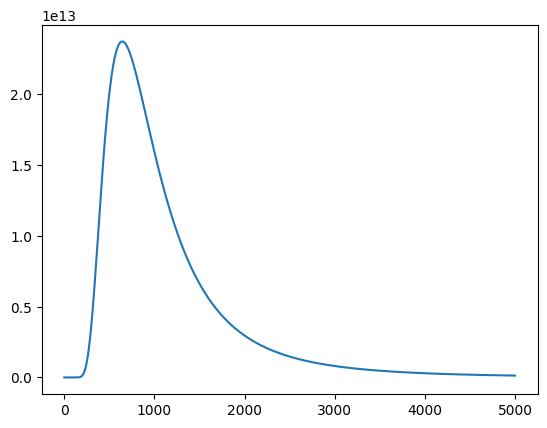

In [2]:
T = 4500
graficoDeI(T)

2. Utilice la derivada de esta expresión para mostrar que la longitud de onda λm en la que se tiene
el máximo de la intensidad satisface la ecuación

In [3]:
f = I(T).f
def derivada(x):    
    h = np.power(10/1,-9)
    return (f(x-h)-f(x+h))/2

/tmp/ipykernel_71750/2533680516.py:14: RuntimeWarning: divide by zero encountered in power
  return (2*np.pi*h*np.power(c,2)*np.power(lamda,-5))/(np.power(np.e,((h*c)/(lamda*k_b*self.T)))-1)
/tmp/ipykernel_71750/2533680516.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  return (2*np.pi*h*np.power(c,2)*np.power(lamda,-5))/(np.power(np.e,((h*c)/(lamda*k_b*self.T)))-1)
/tmp/ipykernel_71750/2533680516.py:14: RuntimeWarning: invalid value encountered in double_scalars
  return (2*np.pi*h*np.power(c,2)*np.power(lamda,-5))/(np.power(np.e,((h*c)/(lamda*k_b*self.T)))-1)
/tmp/ipykernel_71750/2533680516.py:14: RuntimeWarning: overflow encountered in power
  return (2*np.pi*h*np.power(c,2)*np.power(lamda,-5))/(np.power(np.e,((h*c)/(lamda*k_b*self.T)))-1)


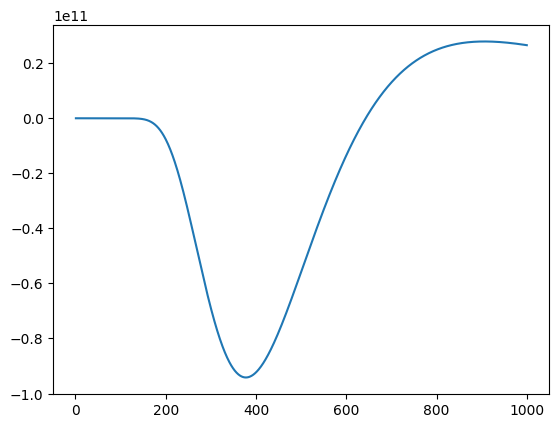

In [4]:
lamdas = [(lamda+1)*np.power(10/1,-9) for lamda in range(1001)]
di = [derivada(lamda) for lamda in lamdas]

plt.plot(di)
plt.show()

Se establece a,b como (400,800) pues ahi esta el maximo y se busca el 0 por biseccion con los incices de la derivada

In [5]:
def biseccion_i(a,b,arreglo):
    c = (a+b)//2
    if (c == a) or (c==b):
        return a,b
    else:
        if(arreglo[a] > 0 and arreglo[c] > 0)or(arreglo[a] < 0 and arreglo[c] < 0):
            return biseccion_i(c,b,arreglo)
        else:
            return biseccion_i(a,c,arreglo)

In [6]:
def ecuacion(l_m):
    return np.power(5*np.e,-(h*c)/(l_m*k_b*T)) + (h*c)/(l_m*k_b*T) - 5

In [7]:
a_i,b_i = biseccion_i(400,800,di)
a,b = lamdas[a_i] , lamdas[b_i]
print(di[a_i],di[b_i],a,b,ecuacion(a),ecuacion(b))

-263388762.171875 13705893.447265625 6.43e-07 6.44e-07 -0.0275529708124731 -0.03527411109993839


In [8]:
lamda_m = a

3. Realice la sustitución de x para mostrar que la longitud de onda correspondiente al má-
ximo de intensidad satisface la Ley de Desplazamiento de Wien

In [9]:
def ecuacion2(x):
    return 5*np.power(np.e,-x)+x-5

In [10]:
x = h*c/lamda_m*k_b*T
b = h*c/k_b*x

print(ecuacion2(x),x)

0.0 1.9193826108896813e-38


4. Escriba un programa que resuelva la ecuación para x con una tolerancia de ε = 10−6 utilizando
el método de busqueda binaria (bisección) y con ello encuentre el coeficiente b en la ley de
desplazamiento.

In [11]:
def biseccion(a,b,f,epsilon):
    c = (a+b)/2
    #print(f(a),f(b),epsilon)
    if (abs(f(c)) <= epsilon):
        return c
    else:
        if(f(a) > 0 and f(c) > 0)or(f(a) < 0 and f(c) < 0):
            return biseccion(c,b,f,epsilon)
        else:
            return biseccion(a,c,f,epsilon)


In [12]:
a = lamdas[400]
b = lamdas[800]

lamda_M = biseccion(a,b,ecuacion,10e-6)

b = lamda_M*T
x = h*c/k_b*b
print(ecuacion2(x))

-0.00016560211412297576


B. El Punto de Lagrange L1

1. Escriba un programa que utilice el método de la secante (o Newton-Raphson)
para resolver esta ecuación y encontrar la ubicación del punto L1 .

In [13]:
def secante(x_n,x_n_1,f,epsilon):
    while(abs(f(x_n)) >= epsilon ):
        x_n1 = x_n - ((x_n-x_n_1)/(f(x_n)-f(x_n_1))*f(x_n))
        x_n_1 = x_n
        x_n = x_n1
    return x_n1

In [14]:
def ecuacion3(r):
    G = 6.674e-11
    M = 5.974e24
    m = 7.348e22
    R = 3.844e8
    w = 2.662e-6

    return ((G*M/np.power(r,2))-(G*m/np.power(R-r,2)))/np.power(w,2)

In [15]:
rSolucion = secante(1,2,ecuacion3,3e-7)
print(rSolucion,ecuacion3(rSolucion))

346024120.78915304 -2.4480154451029443e-07


L1 esta a aproximadamente 326'000.000 metros de la tierra entonces 346'024.120 funciona

C. Periodicidad de las Manchas Solares

1. Escriba un programa que lea el conjunto de datos y grafique la información contenida. El nú-
mero de manchas es un indicador de actividad solar. Con ayuda de este gráfico, intente estimar
el periodo del ciclo de actividad solar en meses.

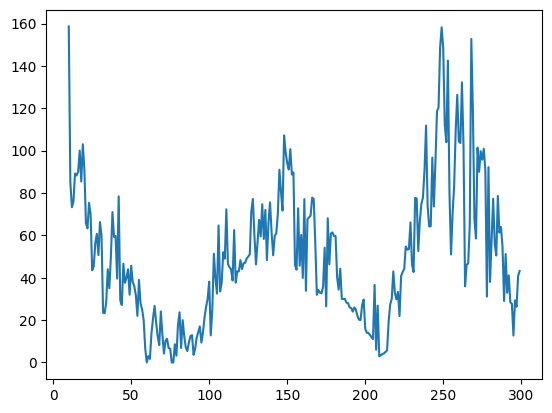

In [16]:
import pandas as pd

df = pd.read_csv("ManchasSolares.txt",sep="	")

plt.plot(df["N_manchas"][10:300])
plt.show()

del mes 150 al 250, por lo tanto a ojo serian 100 meses de periodicidad

2. Escriba una función que calcule la Transformada Discreta de Fourier (DFT) de los datos leidos
y realice un gráfico de la magnitud de los coeficientes de Fourier |ck |^2 contra el número k. Este
gráfico se denomina Espectro de Potencias de la señal de manchas solares. Identifique el máximo
en el gráfico, el cual corresponde a la frecuencia que presenta la mayor amplitud dentro de la
serie de Fourier.

In [17]:
def dft(arreglo):
    N = len(arreglo)
    X = [0] * N

    for k in range(N):
        X[k] = complex(0, 0)
        for n in range(N):
            angle = 2 * np.pi * k * n / N
            X[k] += arreglo[n] * complex(np.cos(angle), -np.sin(angle))

    return X

In [18]:
dft_manchas = dft(df["N_manchas"])

/home/dvill/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


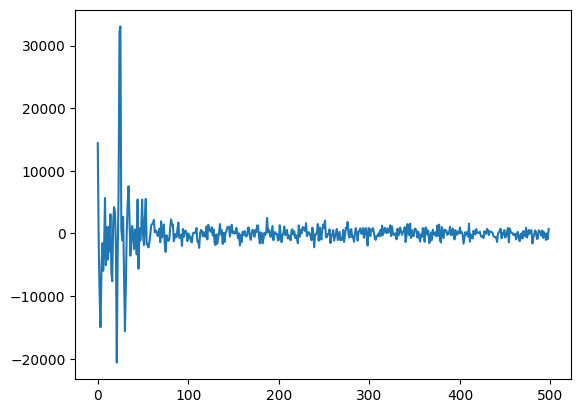

In [19]:
plt.plot(dft_manchas[1:500])
plt.show()

3. Encuente el valor de k correspondiente al máximo y determine el periodo correspondiente a
esta frecuencia. El periodo hallado debe ser similar al que estimó a partir de la gráfica de los
datos originales.

In [20]:
kMax = np.where(dft_manchas[1:500] == np.max(dft_manchas[1:500]))[0][0]
print(kMax)

25


4. Repita el mismo procedimiento utilizando la Transformada Rápida de Fourier FFT (recomiedo
que no cree la función sino que utilice una de las implementaciones de la FFT incorporadas en
su lenguaje de programación de preferencia).

In [21]:
fft_manchas = np.fft.fft(df["N_manchas"])

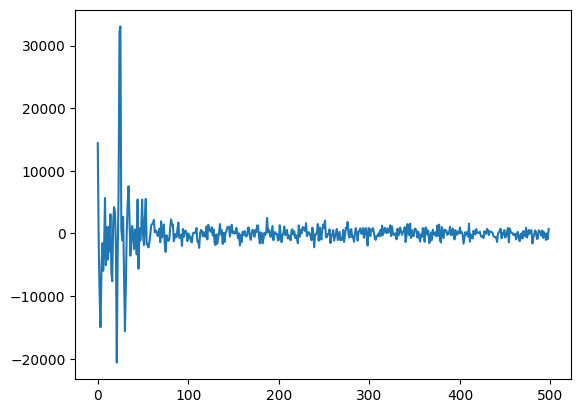

In [22]:
plt.plot(fft_manchas[1:500])
plt.show()

In [23]:
kMaxNp = np.where(fft_manchas[1:500] == np.max(fft_manchas[1:500]))[0][0]
print(kMaxNp)

25


Reconstruccion con dft y fft

In [24]:
def idft(arreglo):
    N = len(arreglo)
    x = [0] * N

    for n in range(N):
        x[n] = complex(0, 0)
        for k in range(N):
            angle = 2 * np.pi * k * n / N
            x[n] += arreglo[k] * complex(np.cos(angle), np.sin(angle))

        x[n] /= N

    return x

In [25]:
recDft = idft(dft_manchas)
recFft = np.fft.ifft(fft_manchas)

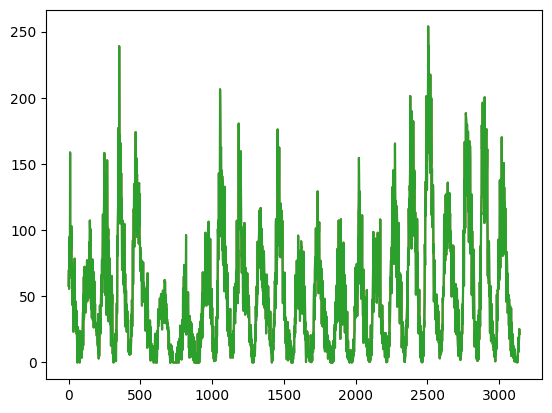

In [26]:
plt.plot(df["N_manchas"])
plt.plot(recDft)
plt.plot(recFft)
plt.show()